In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Data loaded successfully.")
df.head()

Saving titanic.csv to titanic.csv
Data loaded successfully.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
print("Mode of Age:", df["Age"].mode()[0])
print("Mode of Fare:", df["Fare"].mode()[0])

Mode of Age: 24.0
Mode of Fare: 8.05


In [5]:
df_clean = df.dropna(subset=["Age", "Fare", "Sex", "Survived"])

In [6]:
male_fare = df_clean[df_clean["Sex"]=="male"]["Fare"]
female_fare = df_clean[df_clean["Sex"]=="female"]["Fare"]

In [7]:
t_stat, p_value = stats.ttest_ind(male_fare, female_fare)
print("T-test Fare by Sex")
print("t-statistic:", t_stat)
print("p-value:", p_value)

T-test Fare by Sex
t-statistic: -5.022960682752043
p-value: 6.439279020446988e-07


In [8]:
if p_value < 0.05:
    print("Reject H0: Significant difference in average Fare between male and female passengers.")
else:
    print("Fail to reject H0: No significant difference in average Fare between male and female passengers.")

Reject H0: Significant difference in average Fare between male and female passengers.


In [9]:
contingency_table = pd.crosstab(df_clean["Sex"], df_clean["Survived"])
chi2, chi_p, dof, expected = stats.chi2_contingency(contingency_table)

In [10]:
print("\nChi-square test Sex vs Survival")
print("Chi2 Statistic:", chi2)
print("p-value:", chi_p)


Chi-square test Sex vs Survival
Chi2 Statistic: 205.02582752855906
p-value: 1.6716678441395297e-46


In [11]:
if chi_p < 0.05:
    print("Reject H0: Survival is dependent on Sex.")
else:
    print("Fail to reject H0: Survival is independent of Sex.")

Reject H0: Survival is dependent on Sex.


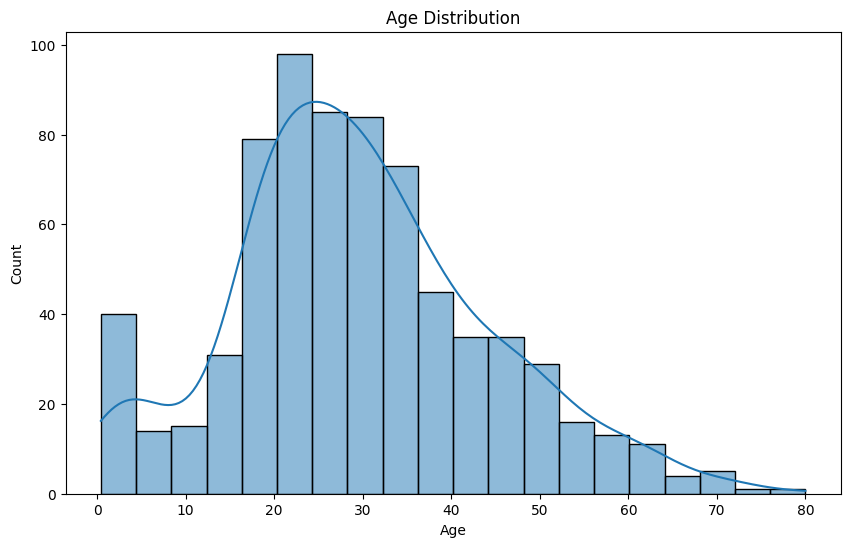

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

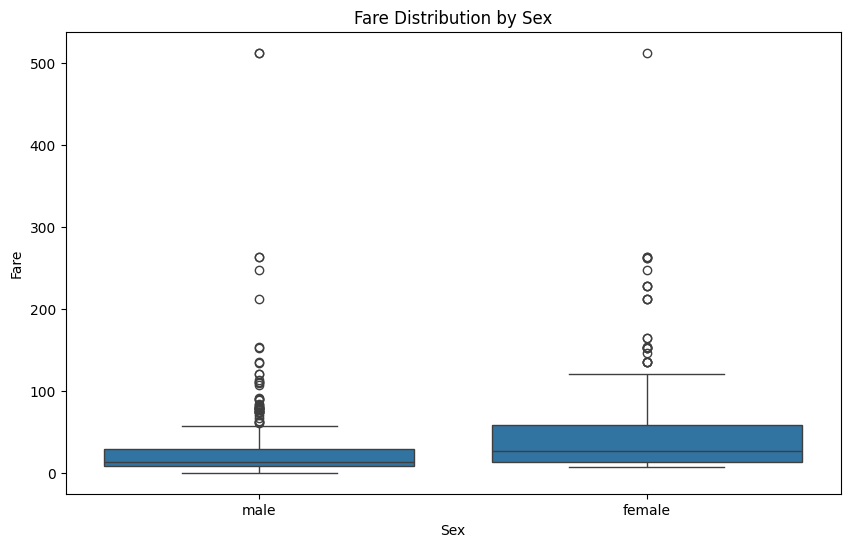

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Sex", y="Fare", data=df_clean)
plt.title("Fare Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.show()

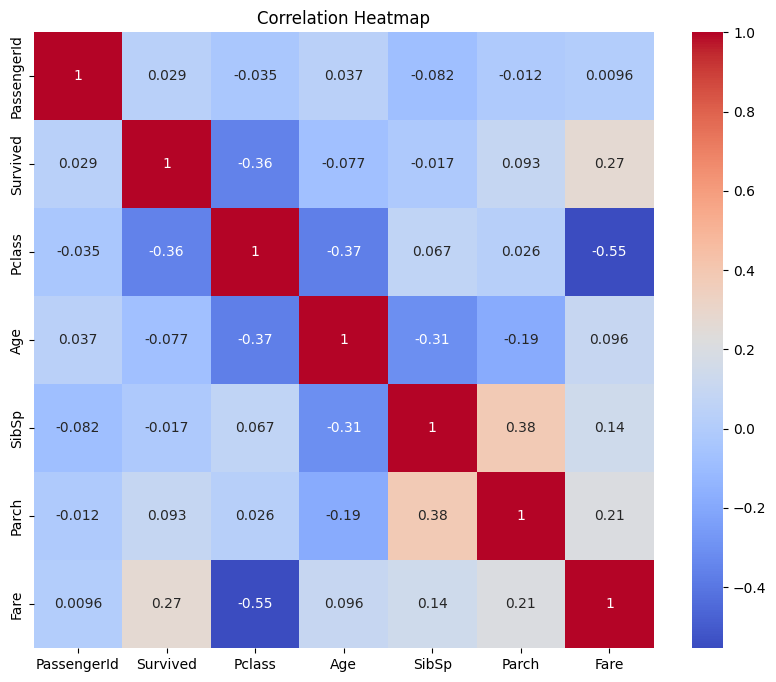

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()